In [2]:
import sys 
import os
sys.path.append(os.path.abspath("./../models/"))
from vgg import gen_net
net, get_vec = gen_net(True)

In [3]:
import cPickle as pickle
import os

import lasagne as nn

PARAM_EXTENSION = 'params'

def read_model_data(model, filename):
    """Unpickles and loads parameters into a Lasagne model."""
    filename = os.path.join('./', '%s.%s' % (filename, PARAM_EXTENSION))
    with open(filename, 'r') as f:
        data = pickle.load(f)
    nn.layers.set_all_param_values(model, data)

read_model_data(net, '../model_params/model-vgg-128-20')

In [4]:
import numpy as np
files = np.load('../datasets/data_set160.npz')
X_train, y_train, X_val, y_val = files['X_train'], files['y_train'], files['X_test'], files['y_test']

In [11]:
b = get_vec([X_val[9]])
for i in range(20):
    a = get_vec([X_val[i]])
    dist = np.linalg.norm(a-b)**2
    print("Dist: %.4f, Class: %d" % (dist, y_val[i]))

[182]
Dist: 0.8015, Class: 5346
[205]
Dist: 3.9787, Class: 5475
[203]
Dist: 0.1844, Class: 5346
[205]
Dist: 1.1404, Class: 5184
[201]
Dist: 2.7429, Class: 5362
[198]
Dist: 0.2179, Class: 5346
[208]
Dist: 1.2879, Class: 5184
[180]
Dist: 0.5562, Class: 5346
[172]
Dist: 0.2193, Class: 5346
[193]
Dist: 0.0000, Class: 5346
[179]
Dist: 0.3548, Class: 5346
[204]
Dist: 2.4035, Class: 5200
[175]
Dist: 0.8465, Class: 5346
[191]
Dist: 2.1958, Class: 5162
[186]
Dist: 2.1523, Class: 5209
[173]
Dist: 1.0861, Class: 5259
[199]
Dist: 2.2749, Class: 5258
[200]
Dist: 2.4695, Class: 5358
[177]
Dist: 0.1864, Class: 5346
[192]
Dist: 1.4642, Class: 5594


In [5]:
import cv2
img = np.load('../mak.npz')['images']
val = np.array([None, None, None])

img[0] = cv2.cvtColor(img[0], cv2.COLOR_BGR2GRAY)
val[0] = cv2.resize(img[0], (img_size, img_size)).reshape(1, img_size, img_size)
img[1] = cv2.cvtColor(img[1], cv2.COLOR_BGR2GRAY)
val[1] = cv2.resize(img[1], (img_size, img_size)).reshape(1, img_size, img_size)
img[2] = cv2.cvtColor(img[2], cv2.COLOR_BGR2GRAY)
val[2] = cv2.resize(img[2], (img_size, img_size)).reshape(1, img_size, img_size)

# print test_fn([val[0]], [val[1]], [X_val[9]])[1][0]
# print test_fn([val[1]], [val[1]], [X_val[9]])[1][0]
# print test_fn([X_val[8]], [val[1]], [X_val[9]])[1][0]
# print test_fn([X_val[9]], [val[1]], [X_val[9]])[1][0]
# print test_fn([X_val[4]], [val[1]], [X_val[3]])[1][0]

for i in range(10):
    print(test_fn([X_val[i]], [X_val[i]], [val[0]]), y_val[i])

([array([ 0.], dtype=float32), array([ 1.03436565], dtype=float32)], 5346)
([array([ 0.], dtype=float32), array([ 2.12385154], dtype=float32)], 5475)
([array([ 0.], dtype=float32), array([ 1.97942352], dtype=float32)], 5346)
([array([ 0.], dtype=float32), array([ 3.10656166], dtype=float32)], 5184)
([array([ 0.], dtype=float32), array([ 1.98594189], dtype=float32)], 5362)
([array([ 0.], dtype=float32), array([ 1.77438843], dtype=float32)], 5346)
([array([ 0.], dtype=float32), array([ 3.24044085], dtype=float32)], 5184)
([array([ 0.], dtype=float32), array([ 1.19178379], dtype=float32)], 5346)
([array([ 0.], dtype=float32), array([ 1.39790058], dtype=float32)], 5346)
([array([ 0.], dtype=float32), array([ 1.36766458], dtype=float32)], 5346)


In [6]:
print(test_fn([val[1]], [val[1]], [val[0]]))
print(test_fn([val[1]], [val[1]], [val[2]]))
print(test_fn([val[2]], [val[2]], [val[0]]))
print(test_fn([val[2]], [val[2]], [X_val[147]]))
print(test_fn([val[2]], [val[2]], [X_val[100]]))
print(test_fn([val[2]], [val[2]], [val[1]]))
print(test_fn([val[1]], [val[1]], [val[0]]))

[array([ 0.], dtype=float32), array([ 0.06281963], dtype=float32)]
[array([ 0.], dtype=float32), array([ 0.17646091], dtype=float32)]
[array([ 0.], dtype=float32), array([ 0.10170946], dtype=float32)]
[array([ 0.], dtype=float32), array([ 0.83268708], dtype=float32)]
[array([ 0.], dtype=float32), array([ 1.17709994], dtype=float32)]
[array([ 0.], dtype=float32), array([ 0.17646091], dtype=float32)]
[array([ 0.], dtype=float32), array([ 0.06281963], dtype=float32)]


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

OK
1.3254
0.839485
1.18648
1.52251
1.21875
1.27876
1.29668
1.27821
1.14525
0.924269
1.50779
0.807152
1.06769
0.755626
1.34715
1.15064
0.914532
0.983788
1.39291
1.50141
1.27781
1.15844
1.6347
1.22378
1.3254
1.17314
0.319026


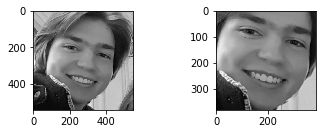

0.106181


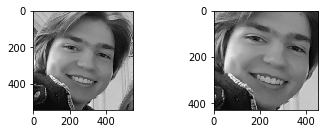

0.746569
1.69332
1.27186
1.212
0.251909


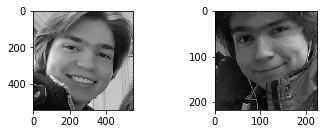

0.419328


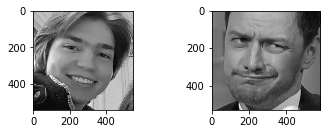

0.38271


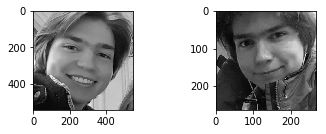

0.815227
0.844154
1.17332
1.65995
1.74977
0.814191
1.46655
0.746474
1.08666
0.67948


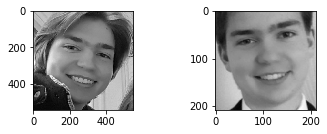

0.995322
1.21091
0.769061
0.839485
1.17314
0.722436
1.18934
0.474069


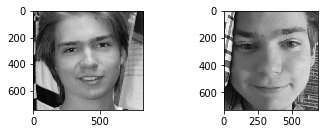

0.215654


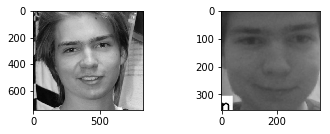

0.516865


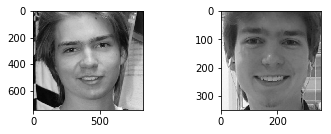

0.438904


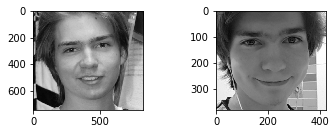

0.966874
0.699022


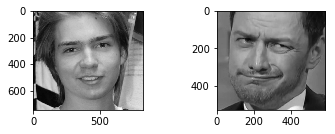

1.29532
0.153761


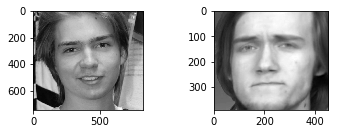

0.183149


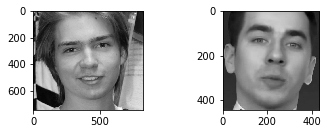

0.588884


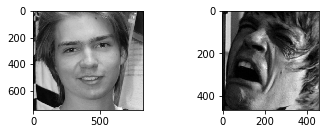

1.1683
0.919639
0.317435


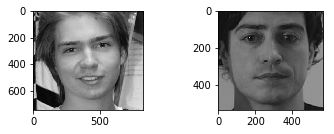

0.197599


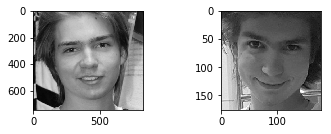

0.673969


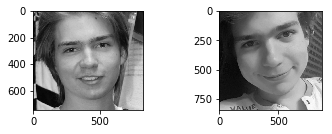

1.32196
0.520247


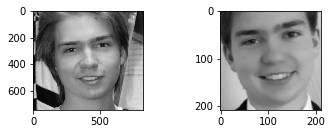

0.804322
1.40298
0.334341


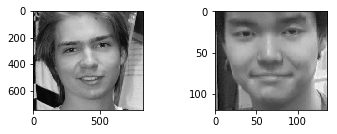

1.18648
0.319026


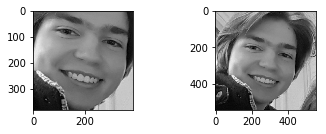

0.722436
0.280174


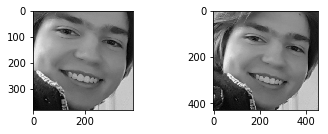

0.723587
1.1496
1.09865
1.01522
0.454202


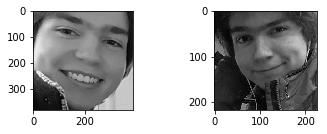

0.63215


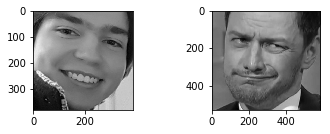

0.82305
0.563904


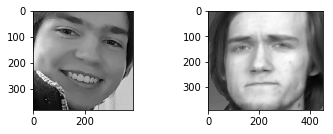

0.515617


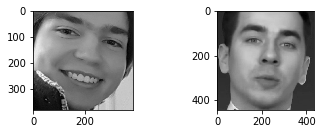

1.23258
1.80127
1.72121
0.671001


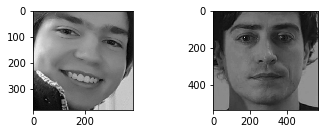

1.01227
0.843092
1.3875
0.5722


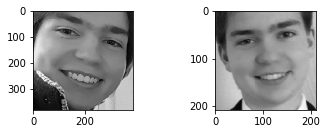

1.15121
1.58201
0.305625


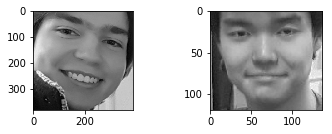

1.52251
0.106181


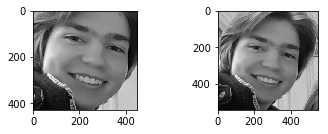

1.18934
0.280174


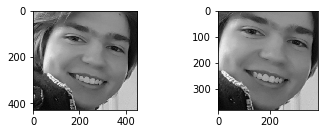

0.643683


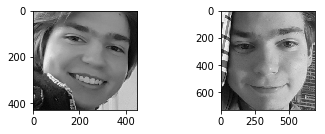

1.78627
1.20919
1.1723
0.231834


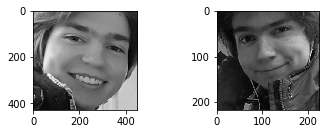

0.423069


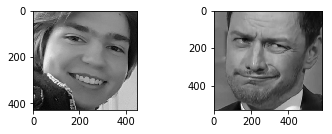

0.291089


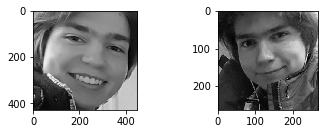

0.870334
0.79476
1.16172
1.68716
1.76205
0.786816
1.55472
0.661559


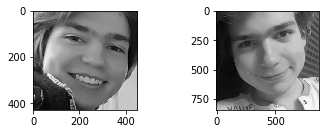

0.967057
0.627141


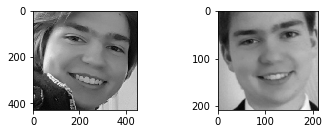

0.958966
1.14216
0.787744
1.21875
0.746569
0.474069


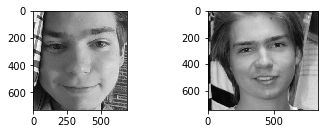

0.723587
0.643683


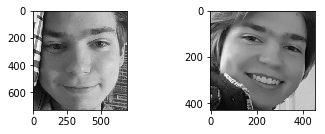

0.751139
0.369425


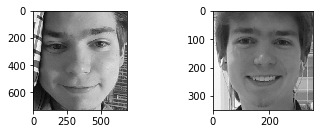

0.384439


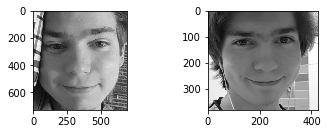

0.556053


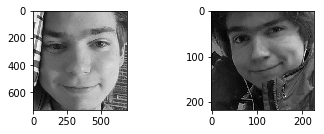

0.222752


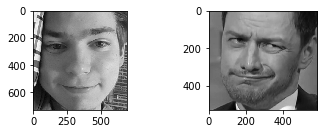

0.487073


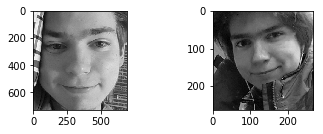

0.269359


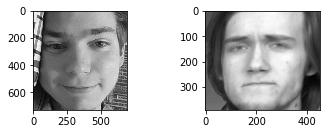

0.219945


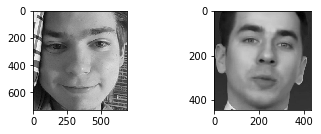

0.461037


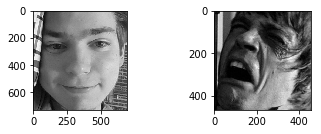

0.873365
0.886476
0.18162


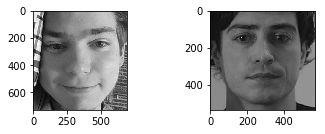

0.653188


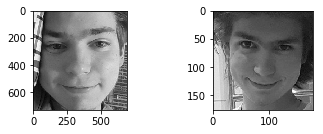

0.172588


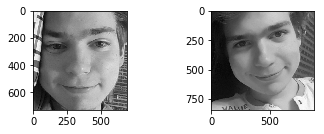

0.588426


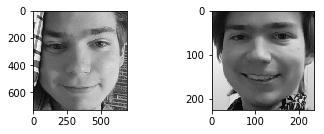

0.209534


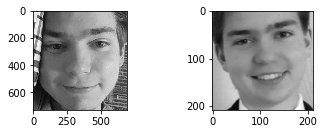

0.369756


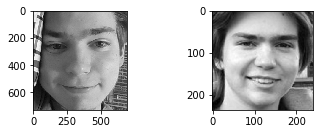

0.648038


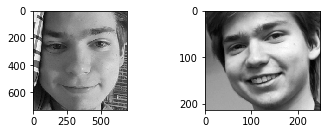

0.531366


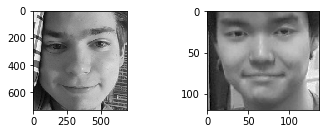

1.27876
1.69332
0.215654


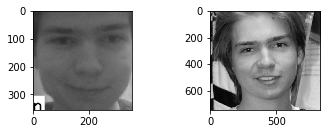

1.1496
1.78627
0.751139
0.547406


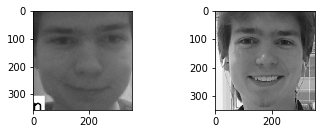

0.454351


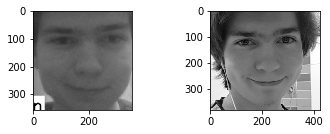

1.54821
1.04628
1.93287
0.322754


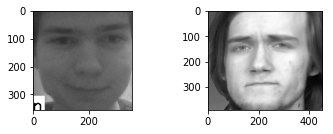

0.32605


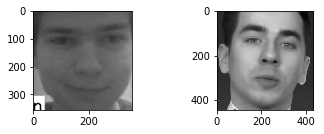

1.01288
1.30914
1.04329
0.465551


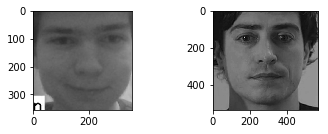

0.101448


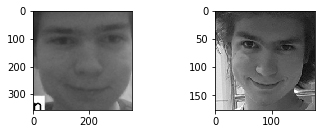

0.965506
1.66577
0.617704


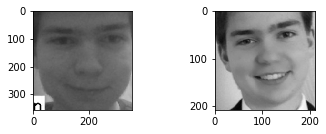

1.06715
1.74765
0.422289


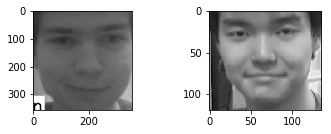

1.29668
1.27186
0.516865


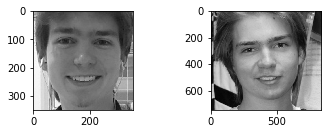

1.09865
1.20919
0.369425


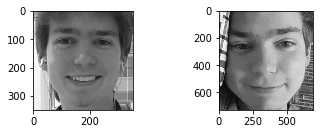

0.547406


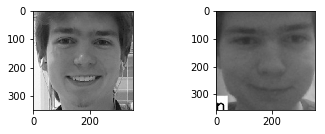

0.0320891


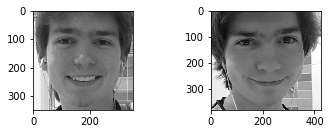

1.21231
0.516062


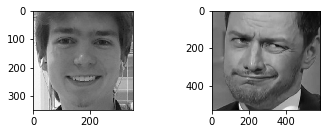

1.1717
0.426388


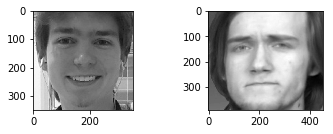

0.295154


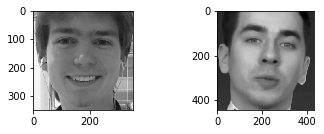

0.496305


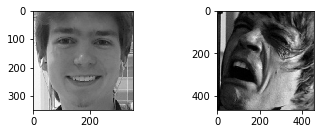

0.407257


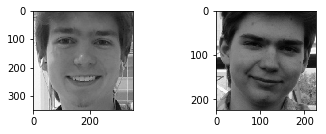

0.34967


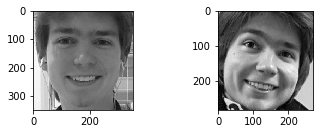

0.154


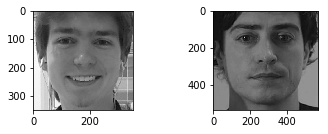

0.356083


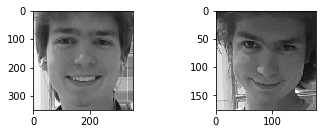

0.438524


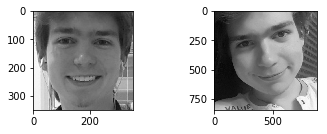

0.537212


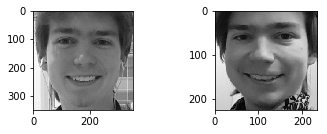

0.206646


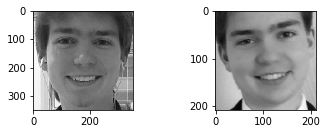

0.242982


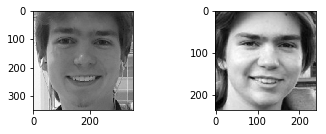

0.63337


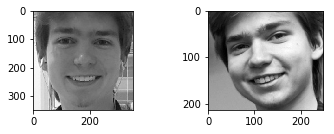

0.748836
1.27821
1.212
0.438904


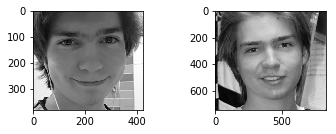

1.01522
1.1723
0.384439


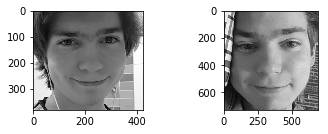

0.454351


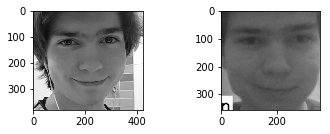

0.0320891


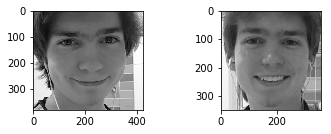

1.1748
0.54109


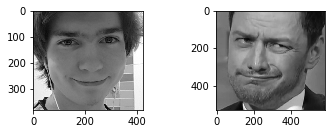

1.18159
0.381722


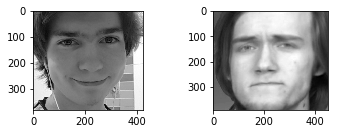

0.244757


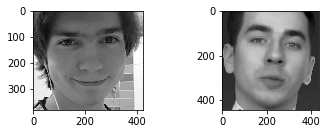

0.511842


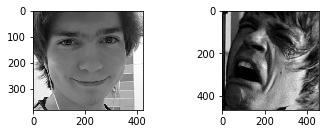

0.49718


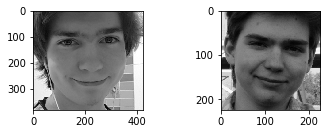

0.41426


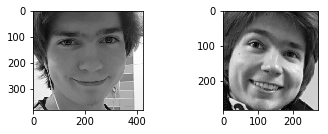

0.153286


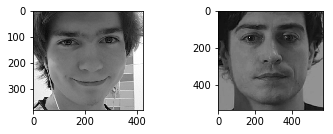

0.301374


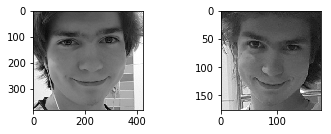

0.416485


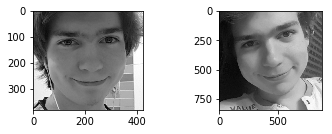

0.653671


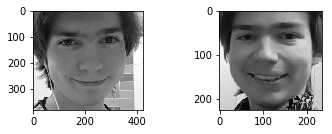

0.196218


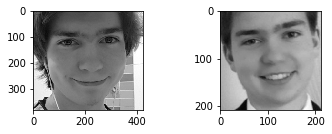

0.298063


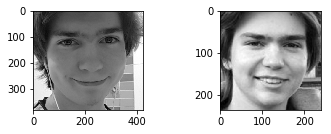

0.720535
0.644284


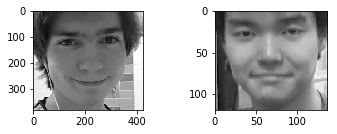

1.14525
0.251909


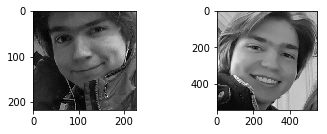

0.966874
0.454202


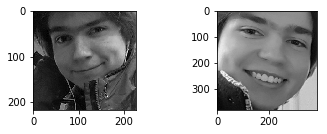

0.231834


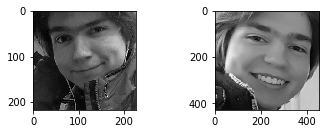

0.556053


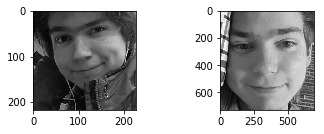

1.54821
1.21231
1.1748
0.347498


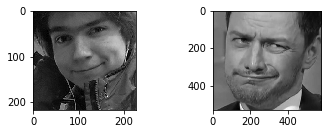

0.17551


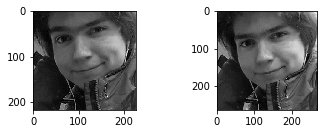

0.73624
0.73263
0.964412
1.72342
1.74421
0.662849


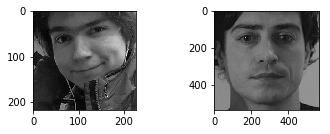

1.36896
0.6742


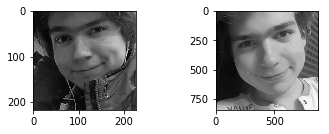

1.05279
0.69071


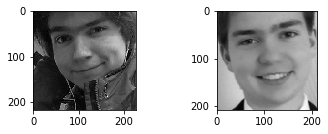

0.986308
1.22896
0.766145
0.924269
0.419328


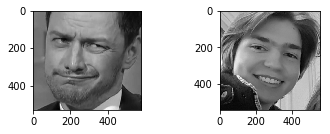

0.699022


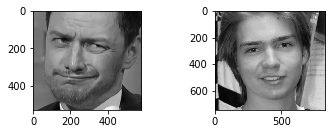

0.63215


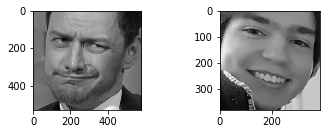

0.423069


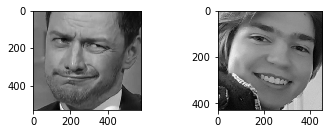

0.222752


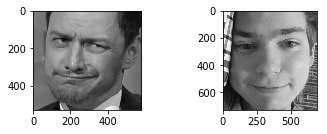

1.04628
0.516062


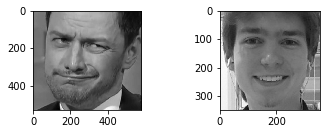

0.54109


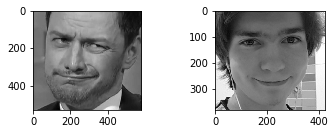

0.347498


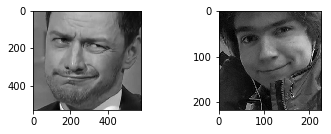

0.305423


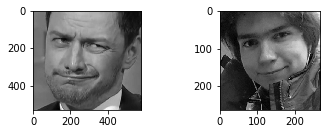

0.371736


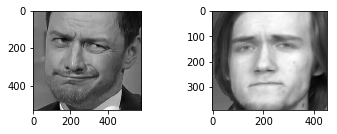

0.441686


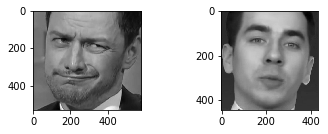

0.425246


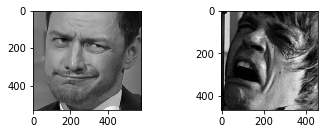

0.7135
0.77408
0.244146


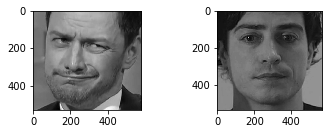

0.818008
0.258675


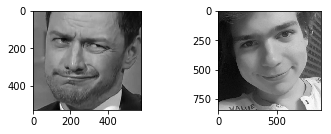

0.386153


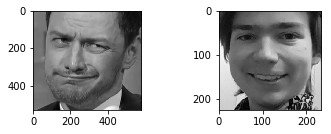

0.28325


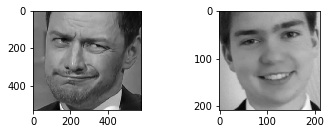

0.276635


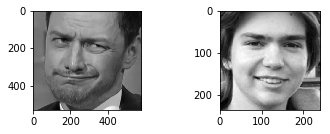

0.482794


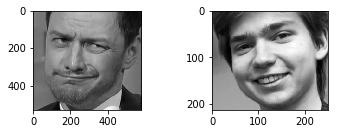

0.694647


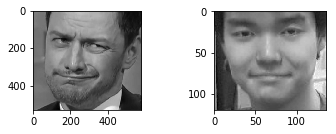

1.50779
0.38271


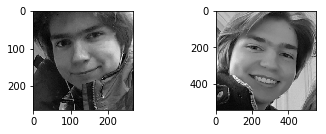

1.29532
0.82305
0.291089


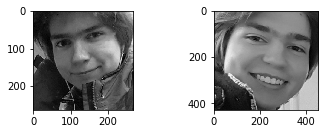

0.487073


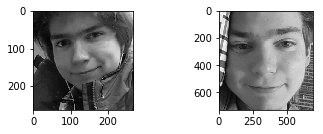

1.93287
1.1717
1.18159
0.17551


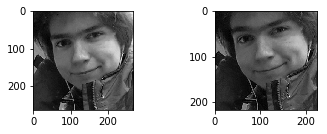

0.305423


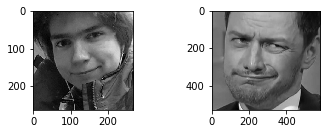

0.958946
0.947074
0.840398
1.44255
1.59062
0.762341
1.70378
0.490837


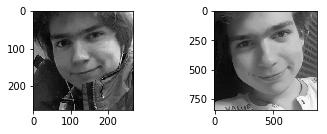

0.713055
0.734825
0.748451
0.783692
1.18398
0.807152
0.815227
0.153761


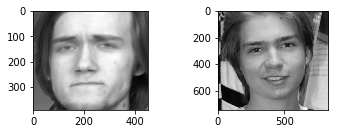

0.563904


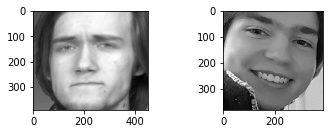

0.870334
0.269359


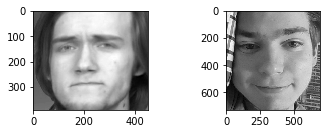

0.322754


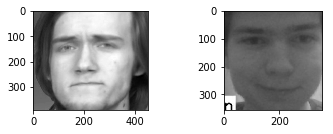

0.426388


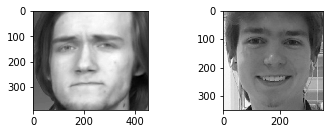

0.381722


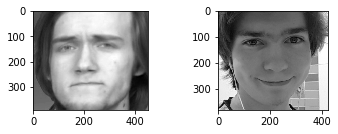

0.73624
0.371736


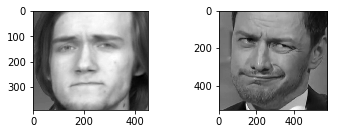

0.958946
0.114194


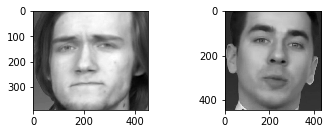

0.496642


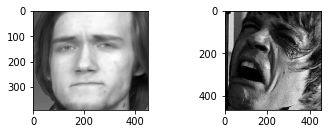

0.929473
0.81606
0.198895


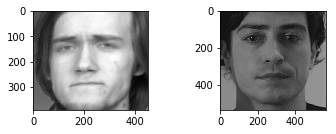

0.263758


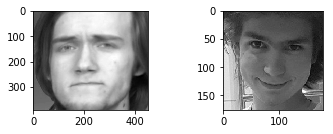

0.42051


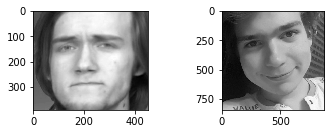

0.963791
0.295265


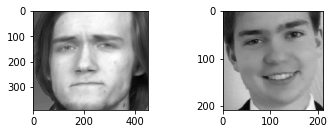

0.526365


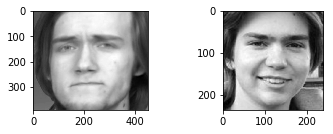

1.00139
0.237158


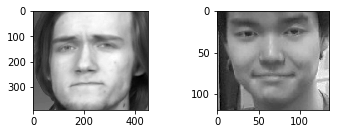

1.06769
0.844154
0.183149


/usr/local/lib/python2.7/dist-packages/matplotlib/axis.py:1035: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


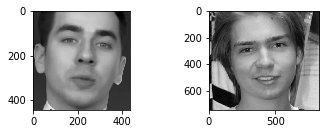

0.515617


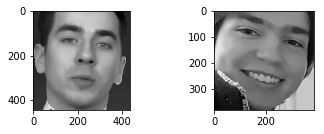

0.79476
0.219945


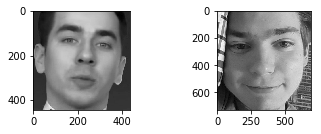

0.32605


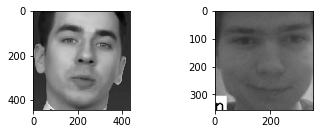

0.295154


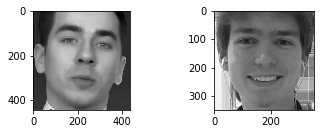

0.244757


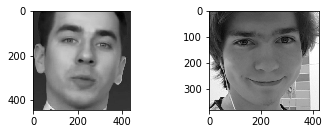

0.73263
0.441686


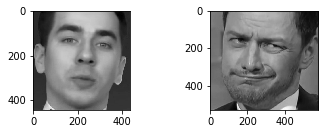

0.947074
0.114194


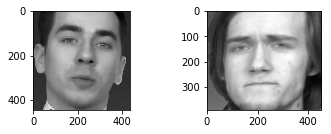

0.651374


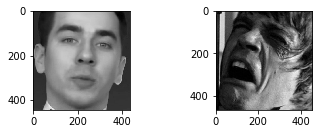

1.01631
0.887277
0.140496


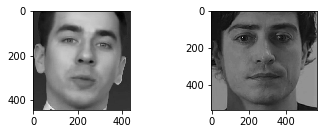

0.271954


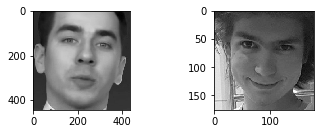

0.424555


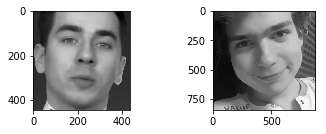

0.932675


KeyboardInterrupt: 

In [16]:
image_count = 25

maks = [None for _ in range(image_count)]
vals = [None for _ in range(image_count)]

for i in range(image_count):
    maks[i] = cv2.imread('../makph/'+str(i+1)+'m.png')
    maks[i] = cv2.cvtColor(maks[i], cv2.COLOR_BGR2GRAY)
    vals[i] = cv2.resize(maks[i], (img_size, img_size)).reshape(1, img_size, img_size)

print 'OK'
    
for i in range(image_count):
    for j in range(image_count):
        if (i != j):
            pr = test_fn([vals[i]], [vals[i]], [vals[j]])[1][0]
            print pr
            if (pr < 0.7):
                fig = plt.figure()
                ax1 = fig.add_subplot(221)
                ax1.imshow(maks[i], cmap='gray')
                ax2 = fig.add_subplot(222)
                ax2.imshow(maks[j], cmap='gray')
                plt.show()

In [17]:
print img_size

160
